## S08 T01: Tasca del test d'hipòtesis

### Exercici 1

Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

**This time I have chosen to work with swimming data in the Olympics dataset.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
data=pd.read_csv('/Users/Diana/Downloads/athlete_events.csv')
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
data=data.dropna()

In [4]:
data['Sport'].unique()

array(['Ice Hockey', 'Gymnastics', 'Alpine Skiing', 'Rowing', 'Football',
       'Fencing', 'Taekwondo', 'Athletics', 'Canoeing', 'Handball',
       'Water Polo', 'Wrestling', 'Sailing', 'Cycling', 'Hockey',
       'Figure Skating', 'Softball', 'Swimming', 'Boxing', 'Basketball',
       'Nordic Combined', 'Diving', 'Baseball', 'Volleyball',
       'Speed Skating', 'Cross Country Skiing', 'Bobsleigh',
       'Modern Pentathlon', 'Curling', 'Judo', 'Rugby Sevens', 'Tennis',
       'Rhythmic Gymnastics', 'Weightlifting', 'Equestrianism',
       'Badminton', 'Beach Volleyball', 'Ski Jumping', 'Shooting',
       'Short Track Speed Skating', 'Biathlon', 'Synchronized Swimming',
       'Freestyle Skiing', 'Triathlon', 'Luge', 'Table Tennis',
       'Snowboarding', 'Skeleton', 'Rugby', 'Archery', 'Tug-Of-War',
       'Trampolining', 'Lacrosse', 'Golf', 'Art Competitions'],
      dtype=object)

In [5]:
#filtering by sport: swimming

swim=data[(data.Sport=='Swimming')]
swim.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
476,259,Reema Abdo,F,21.0,173.0,59.0,Canada,CAN,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Women's 4 x 100 metres Medley Relay,Bronze
803,460,Viktor Andreyevich Aboimov,M,22.0,190.0,78.0,Soviet Union,URS,1972 Summer,1972,Summer,Munich,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Silver
804,460,Viktor Andreyevich Aboimov,M,22.0,190.0,78.0,Soviet Union,URS,1972 Summer,1972,Summer,Munich,Swimming,Swimming Men's 4 x 200 metres Freestyle Relay,Bronze
814,465,"Matthew ""Matt"" Abood",M,30.0,197.0,92.0,Australia,AUS,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Bronze
892,509,Gary Abraham,M,21.0,175.0,64.0,Great Britain,GBR,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Men's 4 x 100 metres Medley Relay,Bronze


In [6]:
swim.describe()

,ID,Age,Height,Weight,Year
count,2486.000000,2486.000000,2486.000000,2486.000000,2486.000000
mean,71657.172164,21.040225,181.111022,73.258045,1988.675784
std,38738.685341,3.682357,9.681349,11.520033,20.303301
min,259.000000,13.000000,150.000000,45.000000,1900.000000
25%,38595.250000,18.000000,173.000000,64.000000,1972.000000
50%,71472.000000,21.000000,181.000000,72.000000,1992.000000
75%,107080.000000,23.000000,188.000000,82.000000,2004.000000
max,135522.000000,41.000000,208.000000,114.000000,2016.000000


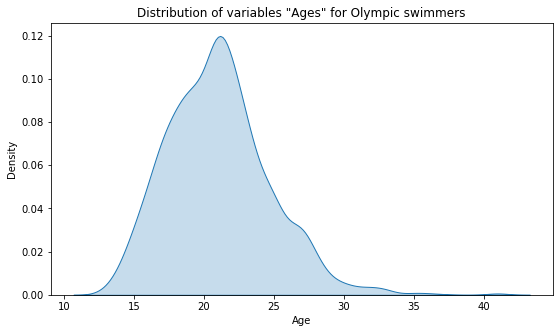

In [7]:
#We will plot the data to get the distribution:


plt.figure(figsize=(9, 5))

sns.kdeplot(swim.Age, shade=True)
plt.title('Distribution of variables "Ages" for Olympic swimmers')
plt.xlabel('Age');

As we can observe the average age is 21 years and most observations are concetrated between 20 and 23 years.

I want to test the following hypothesis:

*Swimmers age is lower than average age at the Olympics*

H0: Swimmers age is equal than the average age

Ha: Swimmers age is not equal than the average age

alpha=0.05%

**I will use T Test (Student T test) to test the hypothesis:**

The One Sample t Test determines whether the sample mean is statistically different from a known or hypothesised population mean.

In [8]:
from scipy.stats import ttest_ind

alpha=0.05

stat, p = ttest_ind(data.Age, swim.Age)
print('stat=%.3f, p=%.3f' % (stat, p))
print('We can not reject H0') if p > alpha else print('We can reject H0')

stat=42.415, p=0.000
We can reject H0


That's right! As we have learn from whole Oympics' population statistics (see table below), we found a difference in average age between all population of players in the Olympics and swimmers average age, with a p-value of 1.0. Therefore, we can't refuse our initial hypothesis Ho: Swimmers average age is equal than Olympics population.

In [9]:
#Stats for the whole dataset including all sports in the Olympics

data.describe().round(2)

,ID,Age,Height,Weight,Year
count,30181.00,30181.00,30181.00,30181.00,30181.00
mean,70225.95,25.43,177.64,73.75,1988.01
std,38839.72,5.05,10.92,15.00,22.72
min,16.00,13.00,136.00,28.00,1896.00
25%,37494.00,22.00,170.00,63.00,1976.00
50%,69771.00,25.00,178.00,73.00,1992.00
75%,104111.00,28.00,185.00,83.00,2006.00
max,135563.00,66.00,223.00,182.00,2016.00


### Exercici 2

Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.


I want to test the following hypothesis:

Ho: Female swimmers average age is equal than male's at the Olympics

Ha: Female swimmers average age is not equal than male's at the Olympics

alpha=0.05%

In [10]:
female=swim[swim.Sex=='F']
male=swim[swim.Sex=='M']

In [11]:
female.describe().round(2)

,ID,Age,Height,Weight,Year
count,1167.00,1167.00,1167.00,1167.00,1167.00
mean,71984.19,19.97,174.28,64.08,1990.86
std,39911.38,3.89,6.53,6.09,17.61
min,259.00,13.00,150.00,45.00,1924.00
25%,36840.00,17.00,170.00,60.00,1976.00
50%,73132.00,19.00,174.00,64.00,1992.00
75%,108198.00,22.00,179.00,68.00,2008.00
max,135489.00,41.00,193.00,85.00,2016.00


In [12]:
male.describe().round(2)

,ID,Age,Height,Weight,Year
count,1319.00,1319.00,1319.00,1319.00,1319.00
mean,71367.84,21.99,187.16,81.38,1986.74
std,37683.55,3.20,7.81,8.77,22.24
min,460.00,15.00,152.00,54.00,1900.00
25%,41831.00,20.00,183.00,75.00,1972.00
50%,70965.00,22.00,188.00,81.00,1988.00
75%,103118.00,24.00,193.00,87.00,2004.00
max,135522.00,37.00,208.00,114.00,2016.00


As we can observe, on average women's age are lower than male's age. Let's try now the hypothesis testing.

**I will use Mann-Whitney U Test**

Tests whether the distributions of two independent samples are equal or not.

In [13]:
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(male.Age, female.Age)
print('stat=%.3f, p=%.3f' % (stat, p))
print('We can not reject H0') if p > alpha else print('We can reject H0')

stat=1037968.500, p=0.000
We can reject H0


That's right! As we have learn from 'Sex' statistics, we found a difference in average age between men and women, with a p-value of 0. Therefore, we can refuse our initial hypothesis H0=Female swimmers average age is equal than male's at the Olympics.

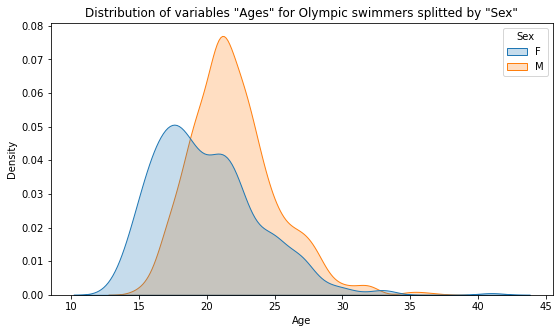

In [14]:
plt.figure(figsize=(9, 5))

sns.kdeplot(x='Age', hue='Sex', data=swim, shade=True)
plt.title('Distribution of variables "Ages" for Olympic swimmers splitted by "Sex"')
plt.xlabel('Age');

### Exercici 3

Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

**I will use an Analysis of Variance Test (ANOVA)**

Tests whether the means of two or more independent samples are significantly different.

So, I will split the data by decades to test if there has been any change in female height values:

Ho: Female average height is equal for 60's, 80's and 2000's

Ha: Female average height is not equal for 60's, 80's and 2000's

alpha=0.05%

In [15]:
f_height_60s=female[(female.Year>=1960) & (female.Year<1970)]
f_height_80s=female[(female.Year>=1980) & (female.Year<1990)]
f_height_2000s=female[(female.Year>=2000)]

In [16]:
from scipy.stats import f_oneway

stat, p = f_oneway(f_height_60s.Age, f_height_80s.Age, f_height_2000s.Age)
print('stat=%.3f, p=%.3f' % (stat, p))
print('We can not reject H0') if p > alpha else print('We can reject H0')

stat=170.357, p=0.000
We can reject H0


We can reject the H0, so with a 5% level of significance, there is a difference between the age of women's swimmers in the 80's, 80's, and 2000's. Let's prove it:

In [17]:
f_height_60s.describe().round(2)

,ID,Age,Height,Weight,Year
count,165.00,165.00,165.00,165.00,165.00
mean,70074.21,17.45,170.36,62.72,1964.41
std,41487.34,2.28,5.32,5.76,3.32
min,2929.00,13.00,150.00,50.00,1960.00
25%,33527.00,16.00,168.00,60.00,1960.00
50%,64398.00,17.00,171.00,61.00,1964.00
75%,113855.00,18.00,173.00,66.00,1968.00
max,131462.00,27.00,183.00,85.00,1968.00


In [18]:
f_height_80s.describe().round(2)

,ID,Age,Height,Weight,Year
count,206.00,206.00,206.00,206.00,206.00
mean,76914.33,18.53,174.91,64.05,1984.25
std,36896.03,2.50,6.10,6.06,3.28
min,259.00,14.00,159.00,48.00,1980.00
25%,48686.75,16.25,171.00,60.00,1980.00
50%,79121.00,18.00,175.00,63.00,1984.00
75%,107758.00,20.00,180.00,68.00,1988.00
max,135302.00,27.00,192.00,82.00,1988.00


In [19]:
f_height_2000s.describe().round(2)

,ID,Age,Height,Weight,Year
count,481.00,481.00,481.00,481.00,481.00
mean,71928.59,22.26,176.65,65.77,2008.07
std,39682.84,3.92,6.14,5.86,5.64
min,980.00,15.00,158.00,48.00,2000.00
25%,36785.00,20.00,173.00,62.00,2004.00
50%,73683.00,22.00,176.00,65.00,2008.00
75%,107518.00,25.00,180.00,70.00,2012.00
max,135489.00,41.00,193.00,85.00,2016.00
